In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the datasets
train_df = pd.read_csv('train.csv')

In [4]:
# Step 1: Handling Missing Values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

C:\Users\p\AppData\Local\Temp\ipykernel_23148\1685897845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\p\AppData\Local\Temp\ipykernel_23148\1685897845.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [5]:
# Step 2: Converting Categorical Variables
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

In [6]:
# Verify the changes
print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare    Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500  Unknown       False        True  
1          PC 17599  71.2833      C85       False       False  
2  STON/O2. 3101282   7.9250  Unknown       False        True  
3            113803  53.1000     C123   

In [7]:
# Step 3: Exploratory Data Analysis (EDA)

# Overall survival rate
overall_survival_rate = train_df['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate:.2f}")

Overall Survival Rate: 0.38


In [8]:
# Survival rate by passenger class
pclass_survival_rate = train_df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Passenger Class:")
print(pclass_survival_rate)

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [9]:
# Survival rate by gender
gender_survival_rate = train_df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(gender_survival_rate)

Survival Rate by Gender:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


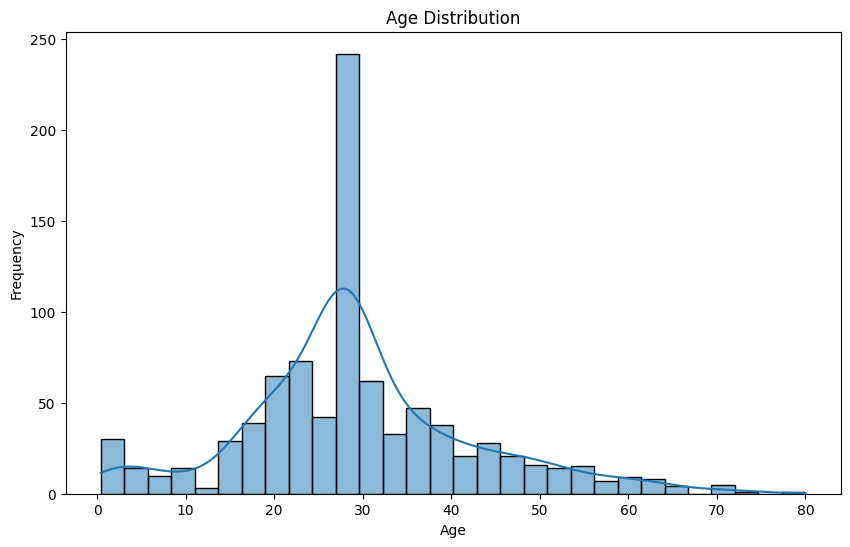

In [10]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\p\AppData\Local\Temp\ipykernel_23148\3713616236.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived'] == 1]['Age'], label='Survived', shade=True)
C:\Users\p\AppData\Local\Temp\ipykernel_23148\3713616236.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived'] == 0]['Age'], label='Not Survived', shade=True)


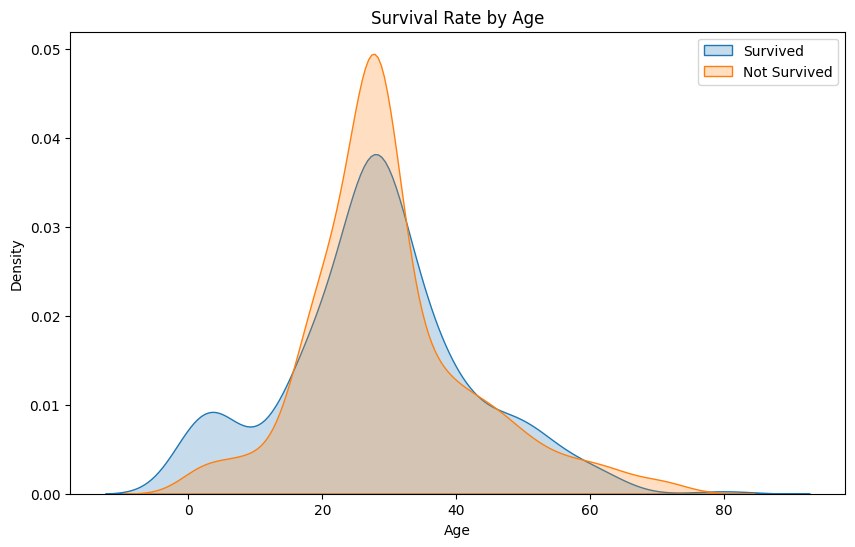

In [11]:
# Survival rate by age
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df[train_df['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(train_df[train_df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

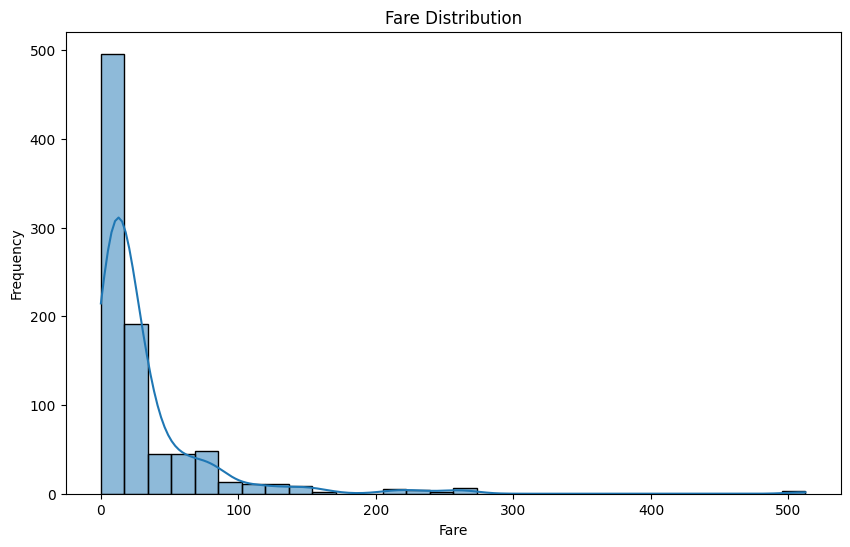

In [12]:
# Distribution of fare
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

C:\Users\p\AppData\Local\Temp\ipykernel_23148\1850645405.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived'] == 1]['Fare'], label='Survived', shade=True)
C:\Users\p\AppData\Local\Temp\ipykernel_23148\1850645405.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Survived'] == 0]['Fare'], label='Not Survived', shade=True)


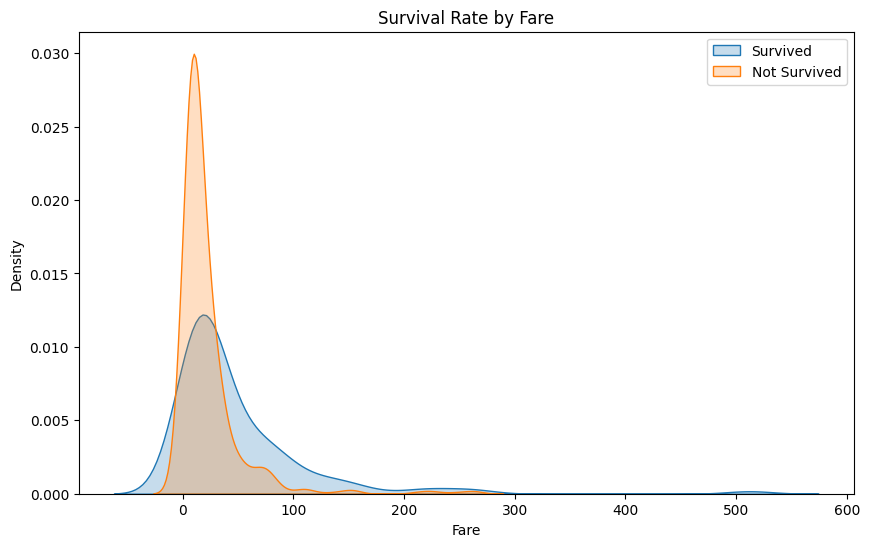

In [13]:
# Survival rate by fare
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df[train_df['Survived'] == 1]['Fare'], label='Survived', shade=True)
sns.kdeplot(train_df[train_df['Survived'] == 0]['Fare'], label='Not Survived', shade=True)
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

In [14]:
# Family size (SibSp + Parch) and survival rate
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
family_survival_rate = train_df.groupby('FamilySize')['Survived'].mean()
print("Survival Rate by Family Size:")
print(family_survival_rate)

Survival Rate by Family Size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [15]:
# Survival rate by port of embarkation
embarked_survival_rate = train_df.groupby(['Embarked_Q', 'Embarked_S'])['Survived'].mean()
print("Survival Rate by Port of Embarkation:")
print(embarked_survival_rate)


Survival Rate by Port of Embarkation:
Embarked_Q  Embarked_S
False       False         0.553571
            True          0.339009
True        False         0.389610
Name: Survived, dtype: float64
